# Train the best model with its best hyper parameters

In [2]:
%run -i 'source.py'
dataset = pd.read_feather("../processing/train_with_feature.feather")
X = dataset[numc_features + ohe_features + te_features]
y = dataset['is_attributed']

deployed_model = XGBClassifier(learning_rate=0.15, n_estimators=200,max_depth=8, n_jobs=10, verbose=True)
deployed_model.fit(X, y)

[05:54:12] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.


XGBClassifier(learning_rate=0.15, max_depth=8, n_estimators=200, n_jobs=10,
              verbose=True)

In [5]:
filename = '../processing/XGBoost_deployed.sav'
pickle.dump(deployed_model, open(filename, 'wb'))

# Make prediction on the unseen data

In [7]:
unseen_data_withfeature = pd.read_feather("../processing/unseen_withfeature.feather")

In [8]:
X_unseen = unseen_data_withfeature[numc_features + ohe_features + te_features]

In [16]:
y_unseen = deployed_model.predict_proba(X_unseen)[:,1]

In [17]:
pd.DataFrame({"click_id": unseen_data_withfeature["click_id"],
              "is_attributed": y_unseen}).to_csv("../output/submission_xgboost.csv", index=False)

In [19]:
pd.read_csv("../output/submission_xgboost.csv")

,click_id,is_attributed
0,0,5.353297e-09
1,1,9.762792e-04
2,2,7.675224e-09
3,3,1.078483e-08
4,4,9.999964e-01
...,...,...
18790464,18790464,9.999959e-01
18790465,18790465,5.735116e-09
18790466,18790466,9.999959e-01
18790467,18790467,8.890840e-05


# Feature Importance of the deployed models

In [1]:
%run -i 'source.py'
deployed_model = pickle.load(open("../processing/XGBoost_deployed.sav", 'rb'))

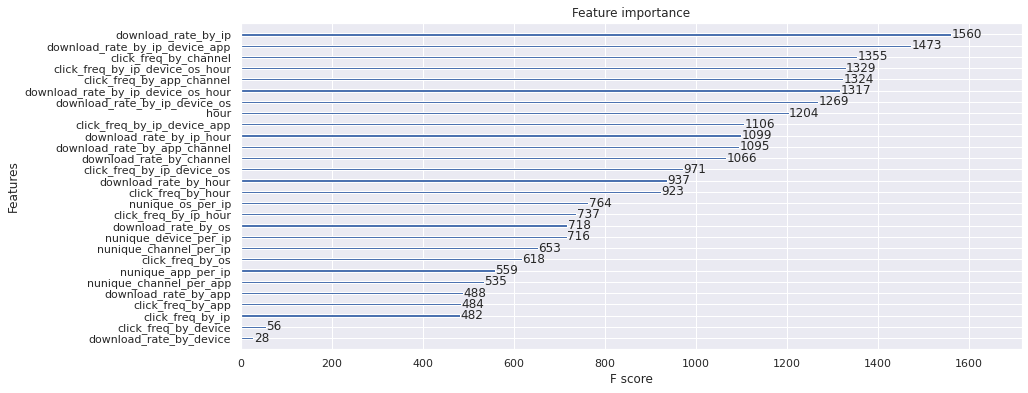

In [12]:
plot_importance(deployed_model)
sns.set_context('paper', font_scale=2)
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize': (14, 6)})
plt.savefig('../output/feature importance.png', dpi=300, bbox_inches='tight')
plt.show()